In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [132]:
vegi_df = pd.read_csv("G:/Meine Ablage/KI_Projekt/Daten/vegi_benchmark_2.csv")
vegi_df = vegi_df.drop(columns=["Unnamed: 0", "green pixels"])
vegi_df.head(10)

,Hight,Width,R,G,B,green pixels,ratio area,circularity,Label,Image
0,77,66,140,121,87,0,0.009937,0.495770,Kartoffel,Kartoffel_136
1,204,154,106,94,83,0,0.002228,0.118154,Kartoffel,Kartoffel_134
2,65,62,97,78,55,0,0.778040,0.709109,Kartoffel,Kartoffel_445
3,81,66,88,71,49,0,0.796203,0.870627,Kartoffel,Kartoffel_376
4,67,65,88,69,49,0,0.779564,0.769380,Kartoffel,Kartoffel_437
5,78,58,80,68,51,0,0.834881,0.866015,Kartoffel,Kartoffel_431
6,79,67,81,69,54,0,0.799452,0.873754,Kartoffel,Kartoffel_397
7,77,75,85,69,51,0,0.783463,0.862881,Kartoffel,Kartoffel_393
8,68,51,50,32,12,0,0.813581,0.856689,Kartoffel,Kartoffel_438
9,71,61,81,69,55,0,0.802932,0.873084,Kartoffel,Kartoffel_408


In [133]:
vegi_df.describe()

,Hight,Width,R,G,B,green pixels,ratio area,circularity
count,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000
mean,186.783913,110.134288,113.753238,88.509202,58.438309,797.755965,0.467672,0.421072
std,64.923150,48.972070,26.711902,23.025116,19.967456,2055.226414,0.308599,0.277029
min,53.000000,22.000000,24.000000,24.000000,8.000000,0.000000,0.000000,0.008207
25%,133.500000,71.000000,96.000000,74.000000,47.000000,0.000000,0.171172,0.156769
50%,188.000000,103.000000,115.000000,87.000000,58.000000,0.000000,0.571470,0.358547
75%,249.000000,136.000000,134.000000,103.000000,69.000000,269.000000,0.749589,0.688988
max,351.000000,255.000000,189.000000,188.000000,191.000000,15125.000000,0.960428,0.898365


In [134]:
vegi_encoded_df = vegi_df.copy()

vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte', 'Label'] = 0
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel', 'Label'] = 1
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel', 'Label'] = 2
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Karotte_Trieb', 'Label'] = 3
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Kartoffel_Trieb', 'Label'] = 4
vegi_encoded_df.loc[vegi_encoded_df['Label'] == 'Zwiebel_Trieb', 'Label'] = 5

vegi_encoded_df['Label'] = vegi_encoded_df['Label'].astype('int')
vegi_encoded_df['Label'].value_counts()

Label
0    294
1    276
2    267
3    260
4    190
5    180
Name: count, dtype: int64

In [135]:
X = vegi_encoded_df.iloc[:, 0:8]
y = vegi_encoded_df.iloc[:, 8:10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Image names are only for assignment from datapoint to corresponding image
image_names = y_train.iloc[:,1]  
image_names_test = y_test.iloc[:,1]

y_train_clean = y_train.drop(columns="Image")
y_test_clean = y_test.drop(columns="Image")


In [136]:
print(X_train.head())
print(X_test.head())
print(y_train_clean.head())
print(y_test_clean.head())
print(image_names.head())

      Hight  Width    R    G   B  green pixels  ratio area  circularity
1367    114     80  124   96  64             0    0.778564     0.802140
733     109    109  120   66  56             0    0.698805     0.679840
852     285    116  101   89  48          6817    0.480913     0.308431
1037    245    127  130  118  83          1366    0.533489     0.208252
1405    103     71  106   75  37             0    0.611924     0.449701
      Hight  Width    R    G   B  green pixels  ratio area  circularity
1192    171    130   65   68  63           840    0.573144     0.317039
184     255    102  113   87  65            76    0.620473     0.238582
1220    267    216   97   68  41            30    0.000321     0.042433
67       96     65   63   53  41             0    0.811619     0.822255
220     238    149  115  106  94             0    0.000169     0.123223
      Label
1367      4
733       2
852       3
1037      3
1405      4
      Label
1192      5
184       1
1220      5
67        1
220 

In [137]:
# Scaler
X_train_copy = X_train.copy()

col_names = ['Hight', 'Width', 'R', 'G', 'B', 'green onion pixels', 'ratio area', 'circularity']
features = X_train_copy[col_names]

ct = ColumnTransformer([
        ('standard1', StandardScaler(), ['Hight', 'Width', 'R', 'G', 'B', 'green onion pixels'])
    ], remainder='passthrough')

X_train_scaled = ct.fit_transform(features)

# Scale Testdata
col_names = ['Hight', 'Width', 'R', 'G', 'B', 'green onion pixels', 'ratio area', 'circularity']
features_test = X_test[col_names]
X_test_scaled = ct.transform(features_test)

In [138]:
y_train_clean_2 = y_train_clean.to_numpy()

clf = LogisticRegression(penalty=None, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train_scaled, y_train_clean_2)

c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Leon\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', penalty=None)

In [139]:
print(clf.classes_)
print(clf.coef_[:10])

[0 1 2 3 4 5]
[[  1.07052809  -1.33535009   1.83175783  -2.24374485   0.6192158
   10.14079124   1.86881367  -3.41334287]
 [ -0.8120655    0.53051373  -5.81651244   7.23492837  -2.01214187
  -19.10588466  -0.55847055   4.8210093 ]
 [ -0.83583469   0.82175627   4.3201595   -6.54677205   3.08387474
  -12.7905032   -1.2151835    2.01188851]
 [  1.30116458  -0.33747391  -0.10563823   0.5301096   -0.37315427
   16.33658734  -0.73756504  -2.9248036 ]
 [ -1.30478008   0.88344228  -1.42211988   3.6016094   -2.15121757
  -10.66594934  -0.77717354   3.57052922]
 [  0.58098759  -0.56288829   1.19235322  -2.57613047   0.83342316
   16.08495862   1.41957897  -4.06528055]]


In [140]:
pred_vegi = clf.predict(X_train_scaled[200].reshape(1, -1))
print(f"Predicted: {pred_vegi}. Groundtruth: {y_train_clean_2[200]}")

Predicted: [0]. Groundtruth: [0]


In [141]:
y_train_pred = clf.predict(X_train_scaled)
y_test_pred = clf.predict(X_test_scaled)

In [142]:
accuracy_testdata = accuracy_score(y_test_clean, y_test_pred)
accuracy_traindata = accuracy_score(y_train_clean_2, y_train_pred)
print(f"Accuracy Test: {accuracy_testdata}\nAccuracy Train: {accuracy_traindata}")

number_correct_testdata = accuracy_score(y_test_clean, y_test_pred, normalize=False)
number_correct_traindata = accuracy_score(y_train_clean_2, y_train_pred, normalize=False)
print(f"Number Correct Predicions Test: {number_correct_testdata}\nNumber Correct Predicions Train: {number_correct_traindata}")

Accuracy Test: 0.7220708446866485
Accuracy Train: 0.6963636363636364
Number Correct Predicions Test: 265
Number Correct Predicions Train: 766


Vegis
[[57  4  9  4  1  2]
 [ 4 48  4  0 10  0]
 [ 2  3 54  0  3  0]
 [ 6  0  0 51  0  7]
 [ 1 11  1  0 38  0]
 [ 7  3  6  8  0 23]]


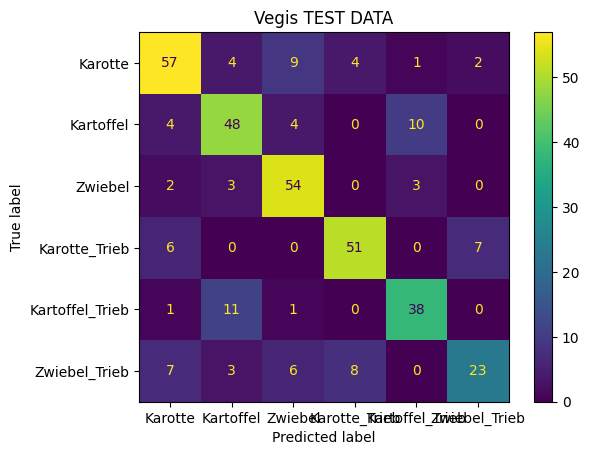

In [129]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test_scaled,
    y_test_clean,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb', 'Kartoffel_Trieb', 'Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TEST DATA")

print("Vegis")
print(disp.confusion_matrix)

In [ ]:
[[147  14  30   3   6  17]
 [ 12 152  12   0  34   0]
 [ 21  13 164   0   5   2]
 [ 13   0   0 169   0  14]
 [  4  37   3   0  95   0]
 [ 27   3  10  32   2  59]]

Vegis TRAIN
[[143  13  31   3   7  20]
 [ 15 151   9   0  35   0]
 [ 20  12 165   0   6   2]
 [ 12   0   0 169   0  15]
 [  5  37   1   0  96   0]
 [ 28   4  10  31   2  58]]


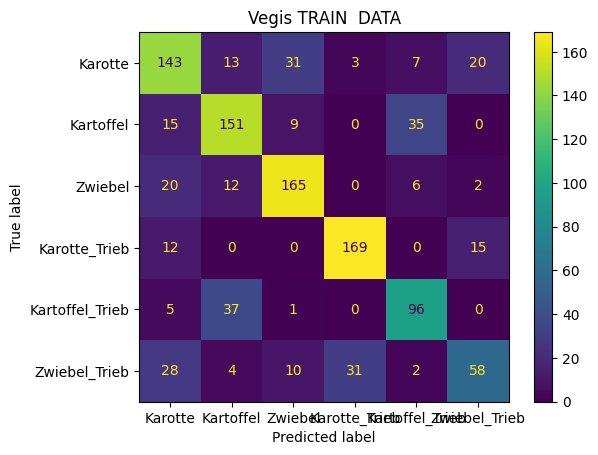

In [130]:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_train_scaled,
    y_train_clean,
    display_labels=['Karotte', 'Kartoffel', 'Zwiebel', 'Karotte_Trieb', 'Kartoffel_Trieb', 'Zwiebel_Trieb'],
    cmap='viridis',
    normalize=None,
)
disp.ax_.set_title("Vegis TRAIN  DATA")

print("Vegis TRAIN")
print(disp.confusion_matrix)